# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats
from scipy.stats import norm


from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [181]:
medical.shape

(1338, 8)

In [182]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

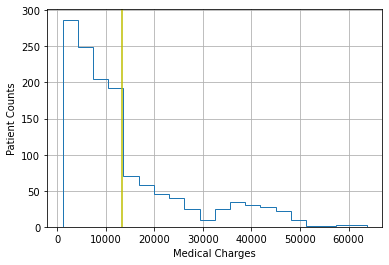

In [183]:
medical.charges.hist(histtype='step', bins = 20)
_=plt.xlabel('Medical Charges')
_=plt.ylabel('Patient Counts')
_ = plt.axvline(charge_mean, color='y')


In [184]:
mcharges = medical.charges
charge_mean = np.mean(mcharges)
charge_std = np.std (mcharges, ddof=1)
print ('The mean of charges:', charge_mean)
print ('The standard deviation of charges:', charge_std)
# The standard deviation is almost as big as the mean which is not ideal at all.
##A lot of values seem to be in the range of 2000 and 120000 and there are large outliers reaching over 65000.
##The mean shouldn't be a go-to measurement. 

The mean of charges: 13270.422265141257
The standard deviation of charges: 12110.011236693994


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Bootstrapping and remsampling the data many times can lead us to more accurate results and allow us to assure the admins on the results. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ One-sided might be enough since the admins are mostly concerned not to see a change in one direction. They try to avoid their average charge to be under12,000. So the lower number must be above 12k for them. 

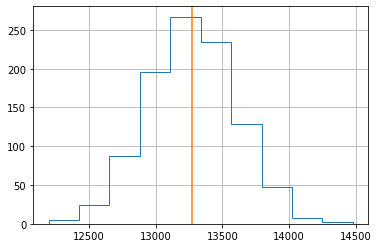

In [185]:
# First let's bootstrap our data
bootstrap = pd.DataFrame({'meancharge': [medical.sample(1338,replace=True).charges.mean() for i in range(1000)]})
bootstrap.meancharge.hist(histtype='step')
plt.axvline(mcharges.mean(),color='C1')

In [186]:
#Now we have better spread data!  Here are the mean and std of the resampled data.
bootstrap_mean = np.mean(bootstrap.meancharge)
bootstrap_std = np.std(bootstrap.meancharge, ddof = 1)
bootstrap_mean, bootstrap_std

(13271.244041053455, 326.7073006947641)

In [187]:
interval =t.interval(0.95, df=1337, loc=bootstrap_mean, scale= bootstrap_std)
interval
# The lower number is above 12,000

(12630.329297383425, 13912.158784723484)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Null hypothesis: Patients with insurance claims are not charged a different amount.
Alternate hyptohesis: Patients with insurance are charegd a different amount. We assume the variances of two groups must not differ.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [188]:
# charges for patients with insurance
w_ins  = medical[medical.insuranceclaim == 1].charges

#the mean of charges for insured people
w_ins_mean = np.mean (w_ins)

# The std of charges for insured people
w_ins_std = np.std (w_ins, ddof=1)

# The count of insured people
w_ins_count = len(w_ins)

print ('The mean of the insured: ' + str(w_ins_mean) + ' \nThe std of the insured: ' + str(w_ins_std), 
       "\n The count of the insured: " + str(w_ins_count))


The mean of the insured: 16423.928276537663 
The std of the insured: 14045.928418802127 
 The count of the insured: 783


In [189]:
# charges for patients without insurance
wo_ins = medical[medical.insuranceclaim == 0].charges

#the mean of charges for uninsured people
wo_ins_mean = np.mean (wo_ins)

# The std of charges for uninsured people
wo_ins_std = np.std (wo_ins, ddof=1)

# The count of uninsured people
wo_ins_count = len(wo_ins)


print ('The mean of the uninsured: ' + str(wo_ins_mean) + ' \nThe std of the uninsured: ' + str(wo_ins_std), 
       "\n The count of the uninsured: " + str(wo_ins_count))





The mean of the uninsured: 8821.421892306294 
The std of the uninsured: 6446.510126811736 
 The count of the uninsured: 555


In [190]:
pooled_std = np.sqrt(((( w_ins_count - 1) *(w_ins_std**2)) + ((wo_ins_count - 1)* (wo_ins_std **2))) / (w_ins_count + wo_ins_count - 2))
print ('The pooled standard deviation is ' + str(pooled_std))

The pooled standard deviation is 11520.034268775256


In [191]:
t_stat = (w_ins_mean - wo_ins_mean) / (pooled_std * np.sqrt(1/ w_ins_count + 1/wo_ins_count))

print ('The t-test statistic is '+ str(t_stat) )

The t-test statistic is 11.89329903087671


In [192]:
# calculation of p_value
pooled_dof = w_ins_count + wo_ins_count - 2
p_value = 2*t.cdf(-t_stats, pooled_dof)

p_value


4.461230231620972e-31

In [193]:

# In order to use scipy.stats function for t-stats we should follow ttest_ind(a, b[, axis, equal_var, ...]). 
# I imported scipy stats on the top of the notebook.


scipy.stats.ttest_ind(w_ins, wo_ins)


Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ In order to use z-test we should know the whole population's standard deviation but here we have access only to a sample.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test